In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
data = pd.read_csv("king_county_dataset.csv")

# Dataset overview
print("Number of instances (rows):", data.shape[0])
print("Number of features (columns):", data.shape[1])
data.info()
data.describe()

Number of instances (rows): 21613
Number of features (columns): 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  float64
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  float64
 12  yr_built       21613 non-null  float64
 13  yr_renovated   21613 non-null  float64
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-nu

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


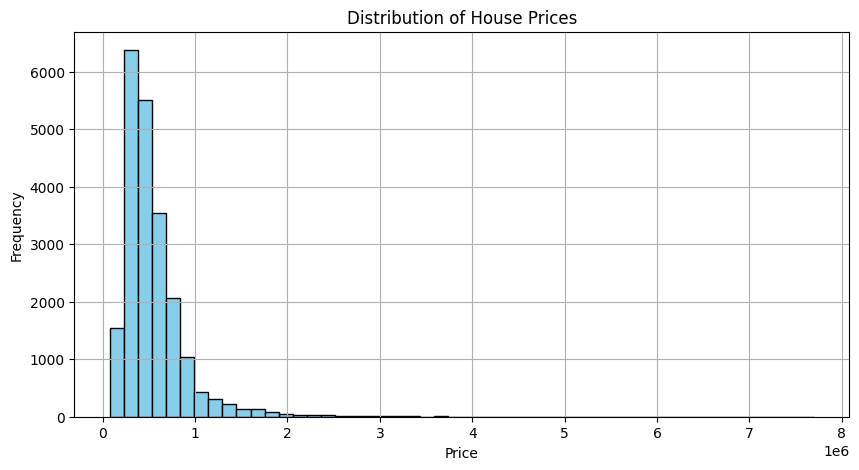

In [2]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [3]:
data = data.drop(columns=['zipcode', 'date_year', 'date_month', 'date_day', 'sqft_above', 'sqft_lot15'])


In [4]:
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
                    'bedrooms', 'bathrooms', 'floors', 'lat', 'long']
categorical_features = ['waterfront', 'view', 'condition', 'grade']

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Combine into preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

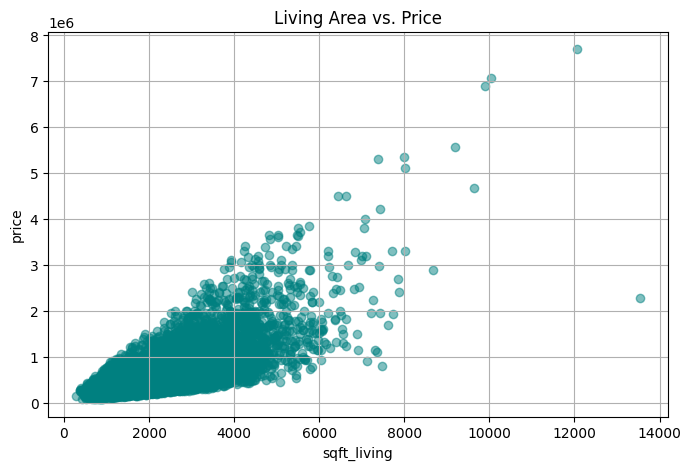

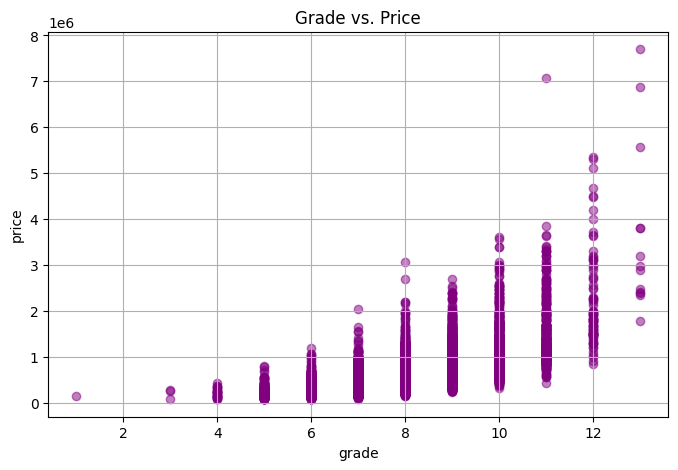

In [5]:
# sqft_living vs. price
plt.figure(figsize=(8, 5))
plt.scatter(data['sqft_living'], data['price'], alpha=0.5, color='teal')
plt.title('Living Area vs. Price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.grid(True)
plt.show()

# grade vs. price
plt.figure(figsize=(8, 5))
plt.scatter(data['grade'], data['price'], alpha=0.5, color='purple')
plt.title('Grade vs. Price')
plt.xlabel('grade')
plt.ylabel('price')
plt.grid(True)
plt.show()

#  'sqft_living' shows a clear positive relationship with price.
# Larger homes generally have higher prices, confirming its value as a predictor.

# Higher grade (quality) correlates with higher price.
# This supports using 'grade' in our regression models.

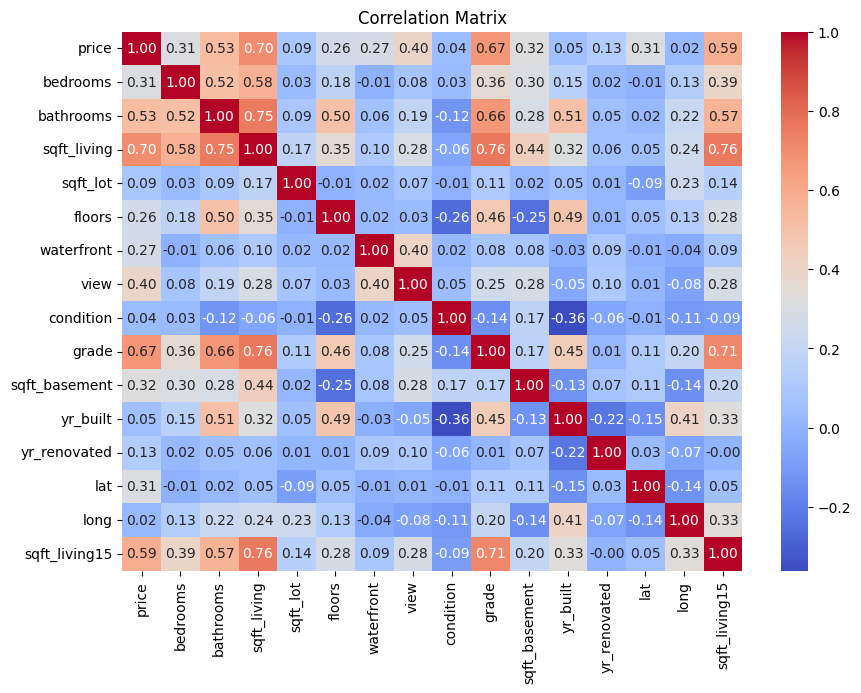

In [6]:
plt.figure(figsize=(10, 7))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Example: 'sqft_living' and 'sqft_above' are often very strongly correlated.
# Consider dropping one to reduce multicollinearity in future model tuning.

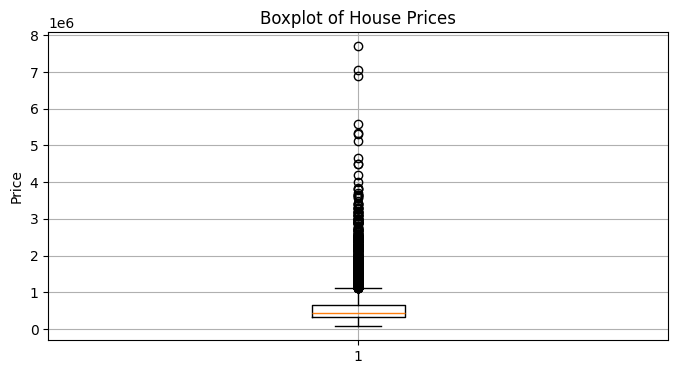

In [7]:
plt.figure(figsize=(8, 4))
plt.boxplot(data['price'])
plt.title('Boxplot of House Prices')
plt.ylabel('Price')
plt.grid(True)
plt.show()

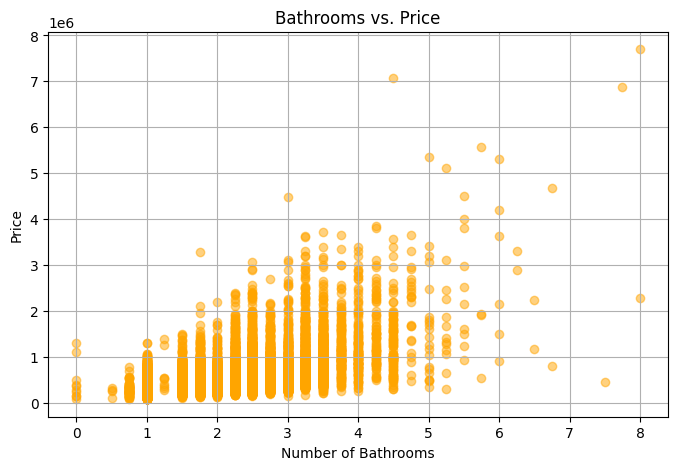

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(data['bathrooms'], data['price'], alpha=0.5, color='orange')
plt.title('Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#  Homes with more bathrooms tend to cost more, though with more variation.
# The trend is positive but not as strong as other features like grade or sqft_living.

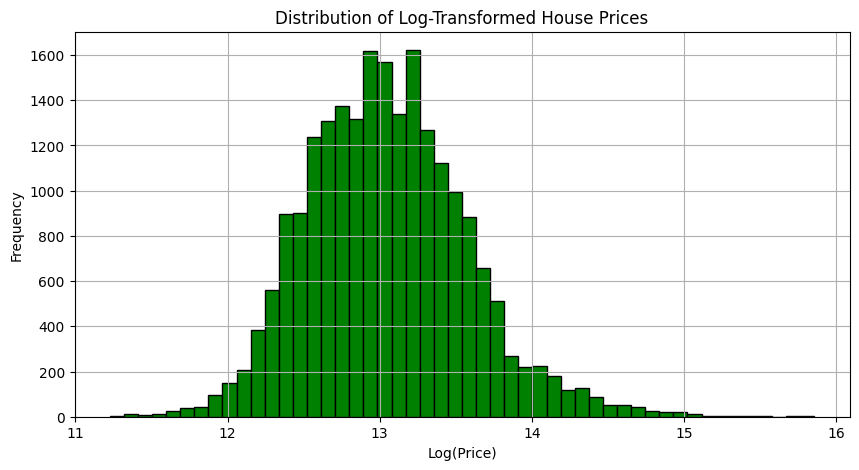

In [ ]:
# Log-transform the price to reduce skewness
import numpy as np
data['log_price'] = np.log1p(data['price'])  

plt.figure(figsize=(10, 5))
plt.hist(data['log_price'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()